<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [859]:
# installing a specific tensorflow version
!pip install tensorflow==2.15.0 -q

In [860]:
# checking if the specified version is installed
import tensorflow as tf
tf.__version__

'2.15.0'

In [861]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve

from matplotlib import pyplot

## Loading the dataset

In [862]:
df = pd.read_csv("Churn.csv")    # complete the code to load the dataset

In [863]:
data = df.copy()

## Data Overview

In [7]:
data.shape

(10000, 14)

####Observations
- We can see that the dataset has 10K rows and 14 columns.

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
data.duplicated().sum()

0

####Observations
- The 'Exited' column will be our target/class variable for the churn analysis.
- There seem to be no missing or duplicated values in the dataset.
- We can drop the RowNumber, CustomerId and Surname columns as they are unique identifiers.
- Geography and Gender are categorical columns.

In [864]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [13]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


####Observations
- Credit Score ranges from 350 to 850. Mean and median are very close, implying a potentially normal distribution. 
- Customers' age ranges from 18 to 92 years with an average around 39 years.
- Average tenure with the bank is 5 years, with minimum at 0 and maximum at 10 years.
- Maximum Total number of product held by customers is 4.
- Balance is left skewed, as indicated by the mean being lower than the median.

## Exploratory Data Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [18]:
def create_outliers(feature: str, data=df):
    """
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

### Univariate Analysis

###Credit Score

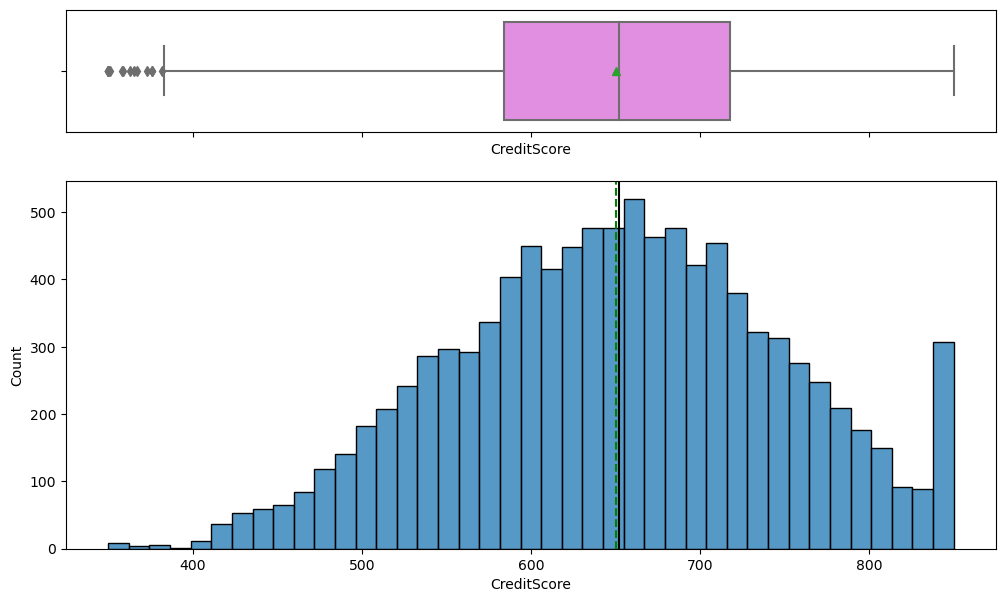

In [19]:
histogram_boxplot(data,'CreditScore')

In [20]:
outliers = create_outliers('CreditScore', data)
outliers['Exited'].value_counts()

1    15
Name: Exited, dtype: int64

####Observations
- Credit Score follows a near normal distribution with average value of 650.
- There are 15 outliers but we will not treat them as they seem to reflect real world scenarios.

###Age

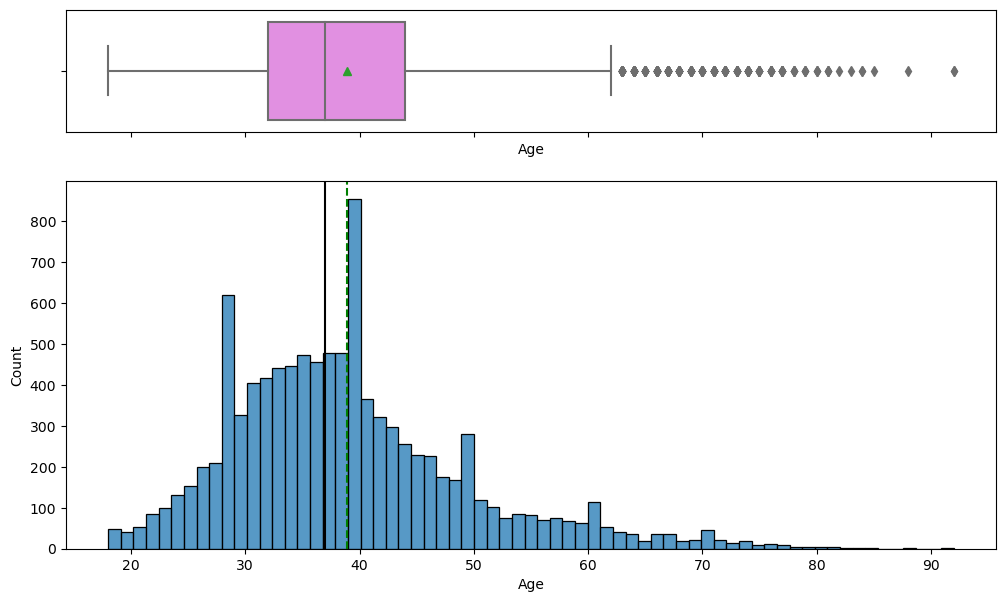

In [21]:
histogram_boxplot(data,'Age')

In [22]:
outliers = create_outliers('Age', data)
outliers['Exited'].value_counts()

0    286
1     73
Name: Exited, dtype: int64

####Observations
- Customer_Age is almost uniformly distributed. There are mmany customers around 18 years of age and 39 years of age.
- There are many outliers but we will not treat them as they seem to reflect real world scenarios.

###Balance

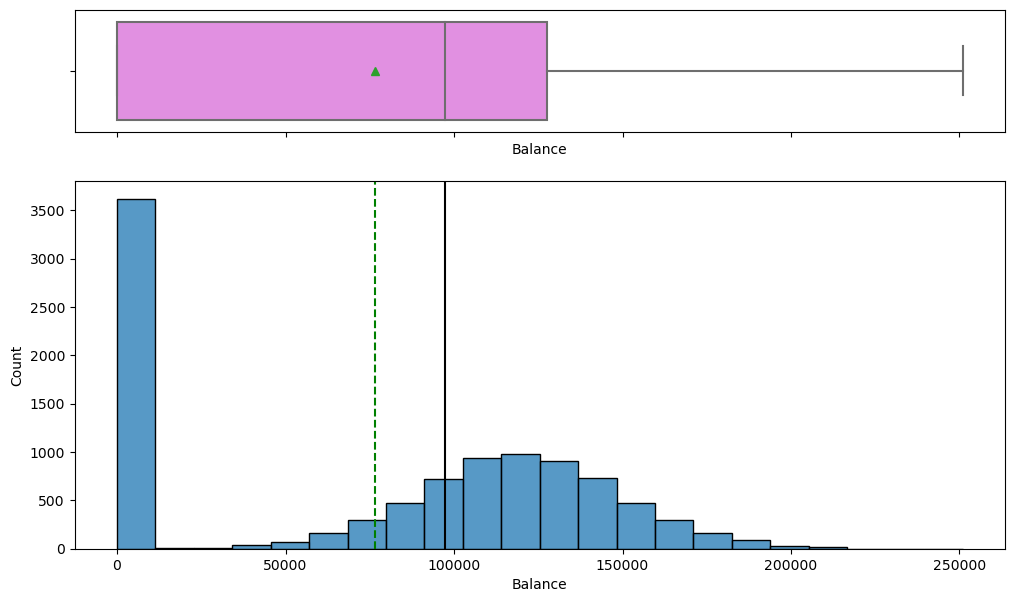

In [23]:
histogram_boxplot(data,'Balance')

####Observations
- There are almost 3500 customers with 0 balance.
- Balance of all other customers follows a normal distribution.

###Estimated Salary

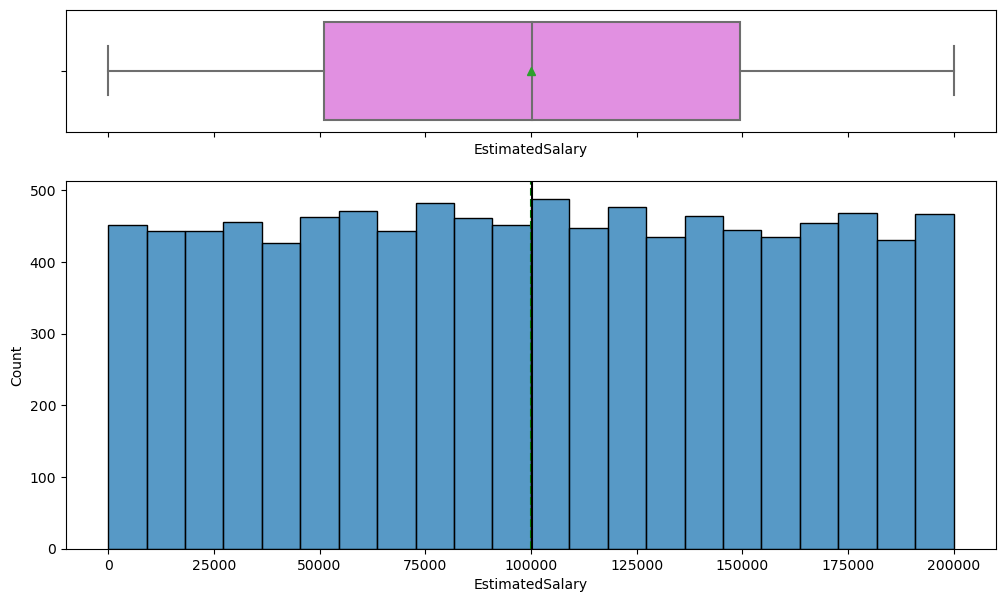

In [25]:
histogram_boxplot(data,'EstimatedSalary')

####Observations
- Estimated salary is uniformly distributed with the mean very close to median.
- There are no outliers.

###Exited

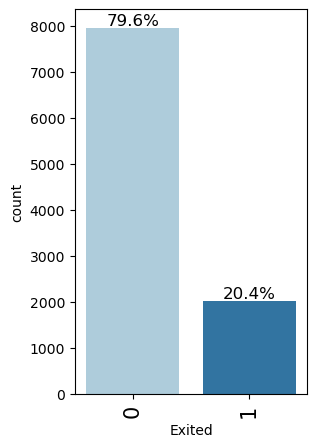

In [27]:
labeled_barplot(data, "Exited", perc=True)

####Observations
- 20% of the customers in the dataset have churned which makes this dataset imbalanced.

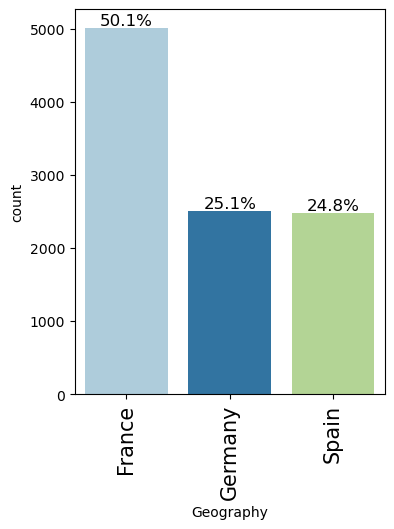

In [28]:
labeled_barplot(data, "Geography", perc=True)

####Observations
- Most customers are from France, followed by Germany and Spain.

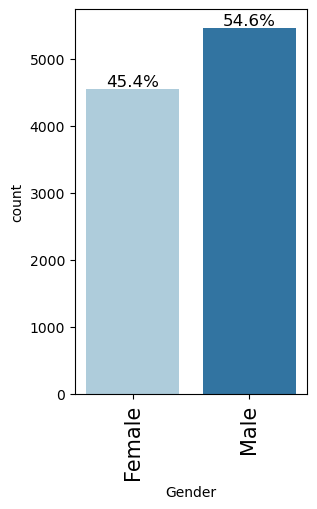

In [29]:
labeled_barplot(data, "Gender", perc=True)

####Observations
- Majority of the customer base is Male.

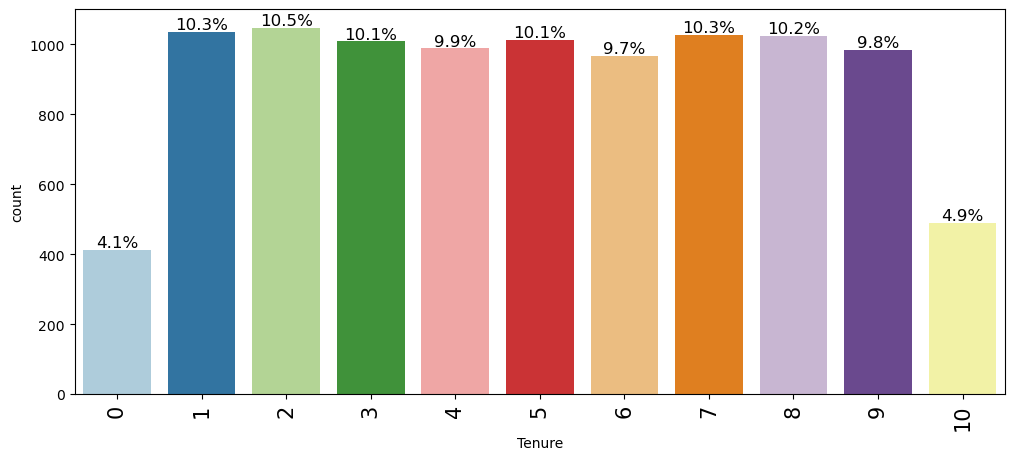

In [30]:
labeled_barplot(data, "Tenure", perc=True)

####Observations
- Most customers fall in the 1-9 years tenure.
- About 900 customers are either in their first or tenth year with the bank.

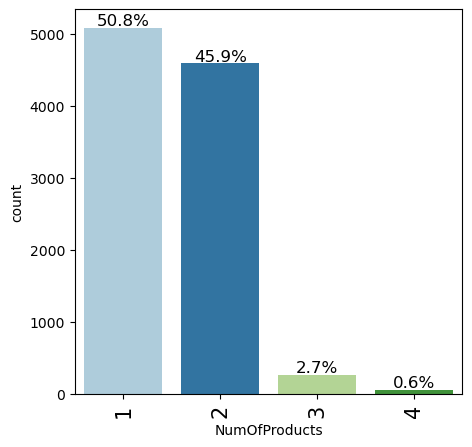

In [31]:
labeled_barplot(data, "NumOfProducts", perc=True)

####Observations
- Most customers have 1 or 2 products with the bank.
- Very few customers have 3 or 4 products.

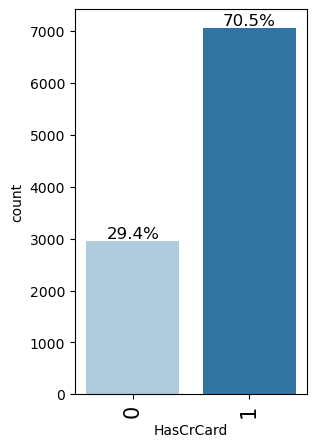

In [32]:
labeled_barplot(data, "HasCrCard", perc=True)

####Observations
- Majority - 71% of the customers have a credit card with the bank.

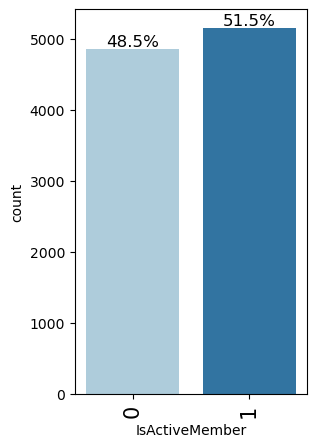

In [33]:
labeled_barplot(data, "IsActiveMember", perc=True)

####Observations
- Almost half the dataset is inactive and not doing any transactions with the bank. This can be concerning.

### Bivariate Analysis

In [34]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

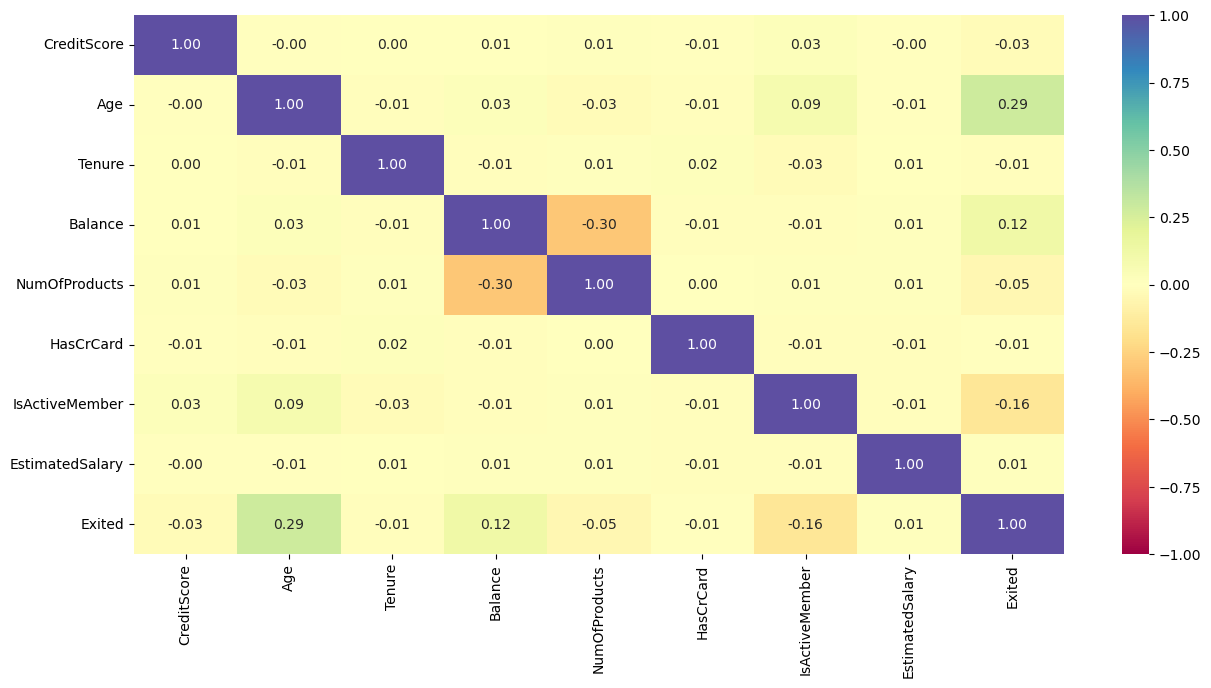

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Observations
- Very weak correlations in general. Only weak positive correlation with age, very weak positive correlation with balance, and  weak negative correlations with number of products and active membership.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


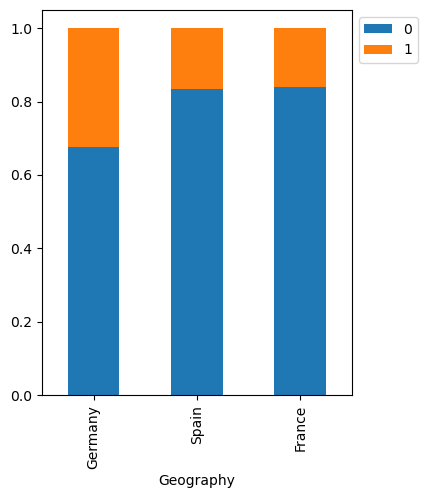

In [36]:
stacked_barplot(data, "Geography", "Exited" )

####Observations
- Customers in Germany are more likely to close accounts than thsose in Spain and France.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


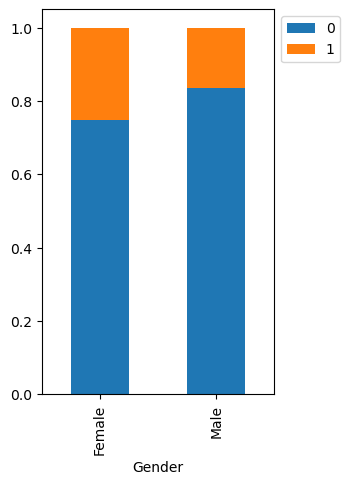

In [37]:
stacked_barplot(data, "Gender", "Exited" )

####Observations
- Females are more likely to close accounts than males.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


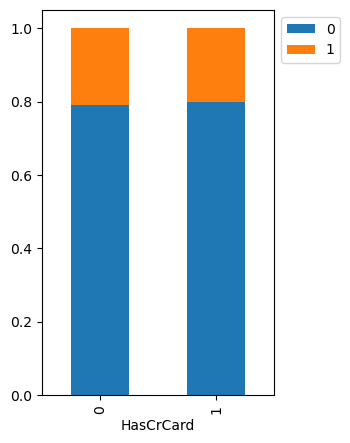

In [38]:
stacked_barplot(data, "HasCrCard", "Exited" )

####Observations
- Presence of a credit card doesn't seem to affect churn.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


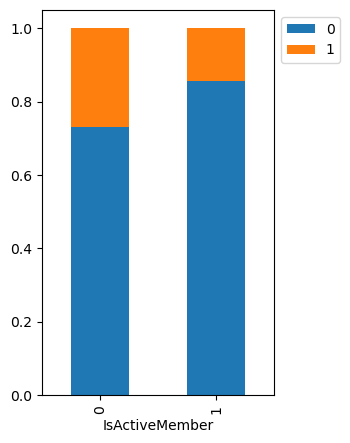

In [39]:
stacked_barplot(data, "IsActiveMember", "Exited" )

####Observations
- Inactive members are more likely to close accounts than active members, which is normal.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


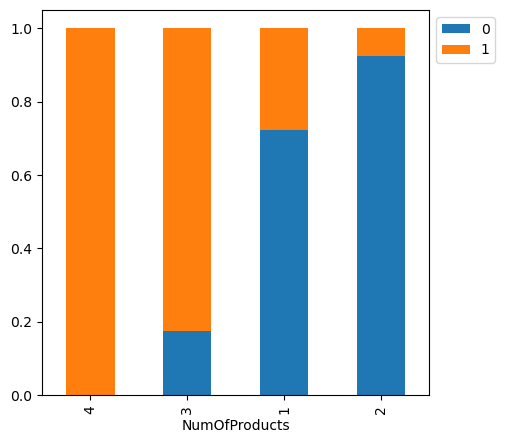

In [40]:
stacked_barplot(data, "NumOfProducts", "Exited" )

####Observations
- Customers with more products have a much higher chance of leaving the bank.

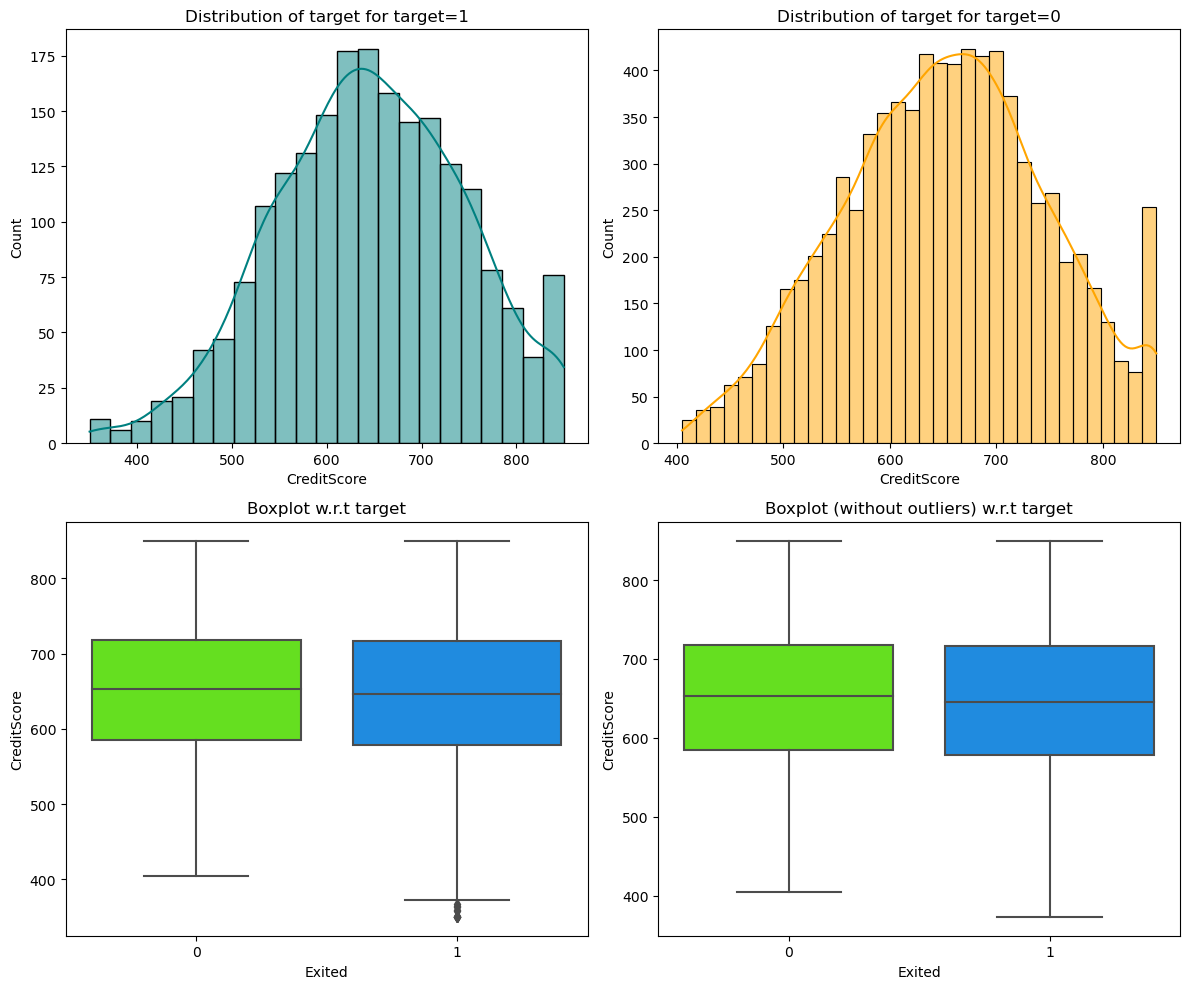

In [41]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

####Observations
- Credit score doesn't seem to affect churn.

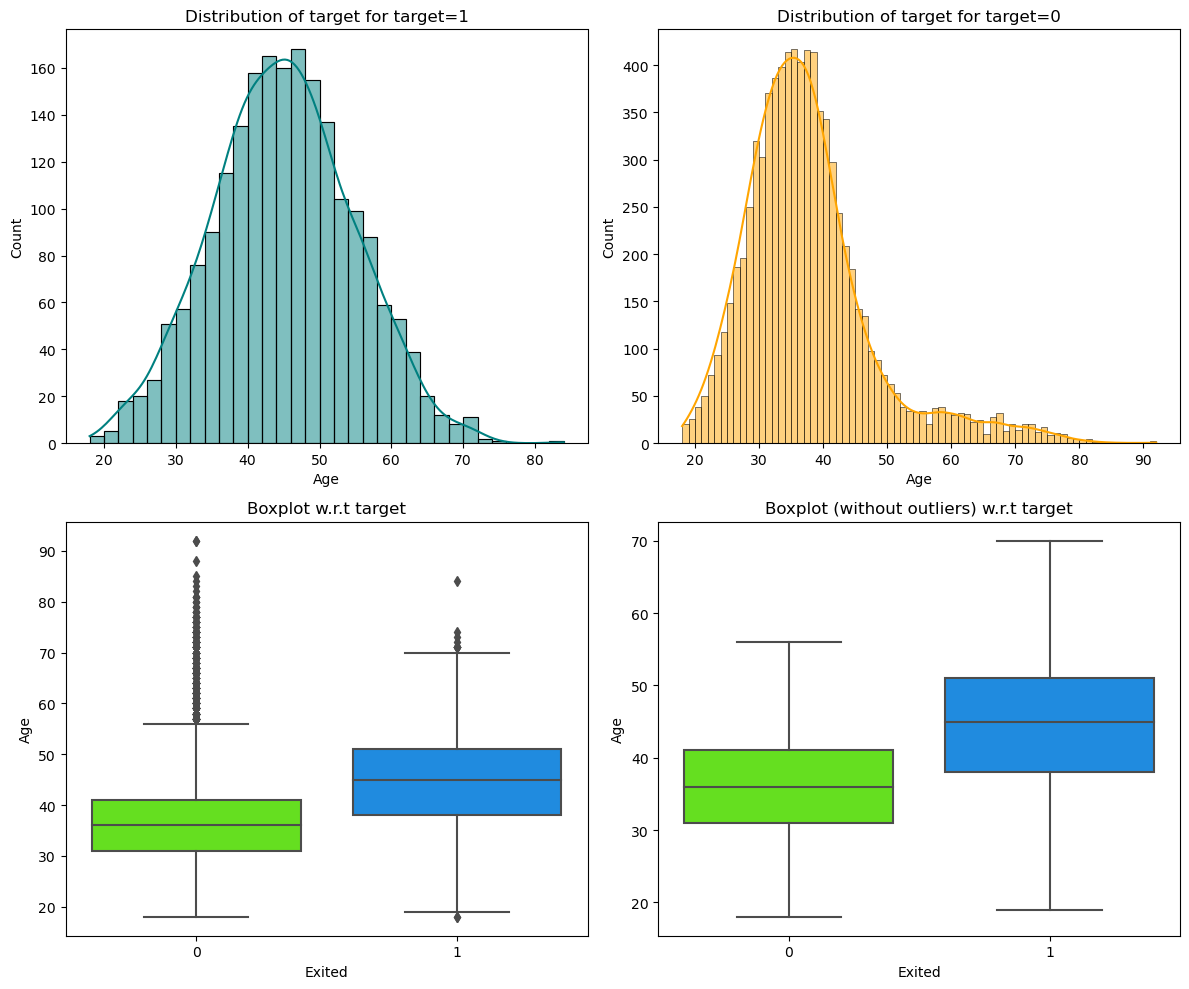

In [42]:
distribution_plot_wrt_target(data, "Age", "Exited")

####Observations
- Younger customers (below 40) tend to keep their accounts open, while more senior customers (40+) tend to close their accounts.

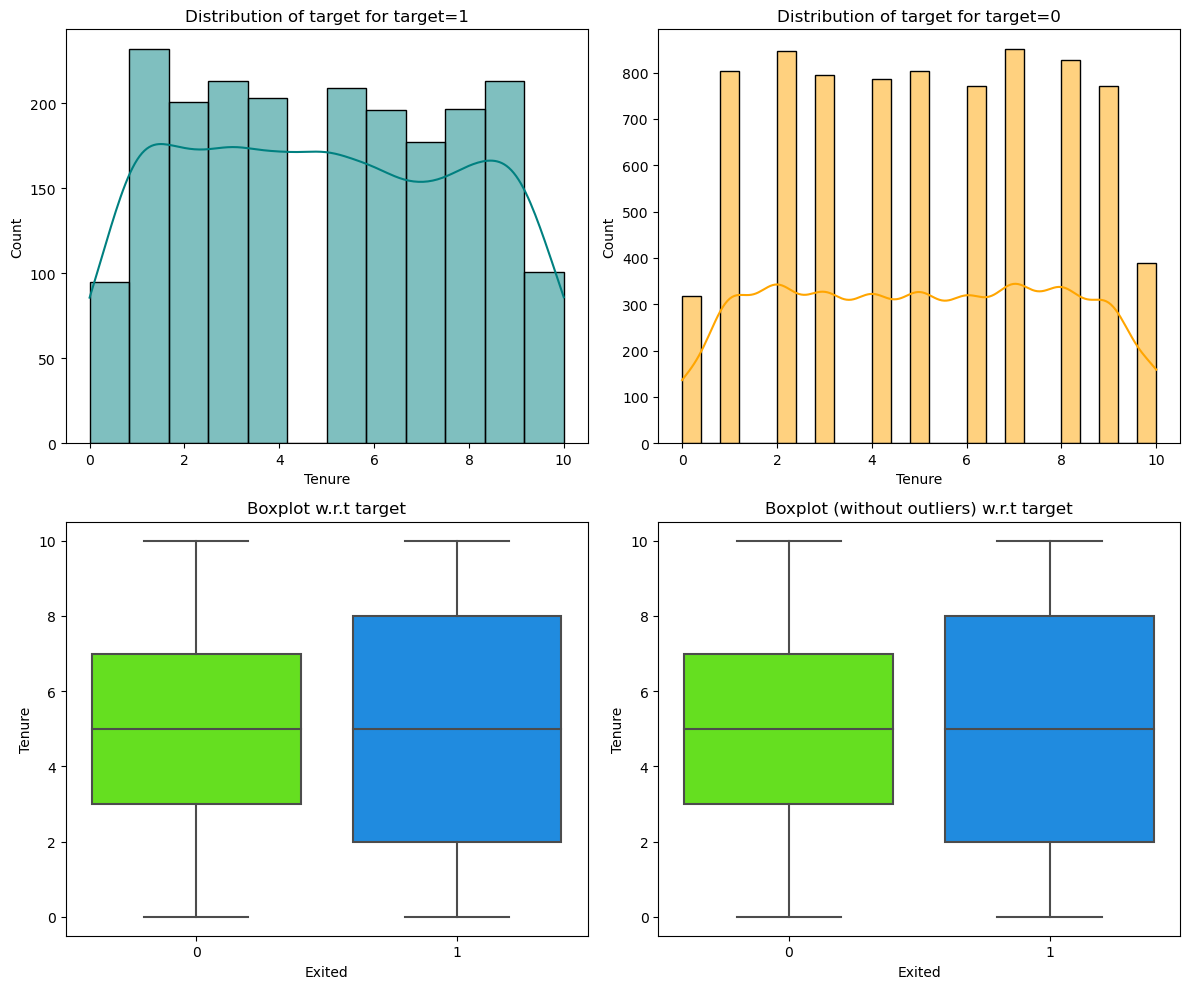

In [43]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

####Observations
- Customers who choose to close their accounts may either have shorter or longer time of experience with the bank service compared with those who keep their accounts open.

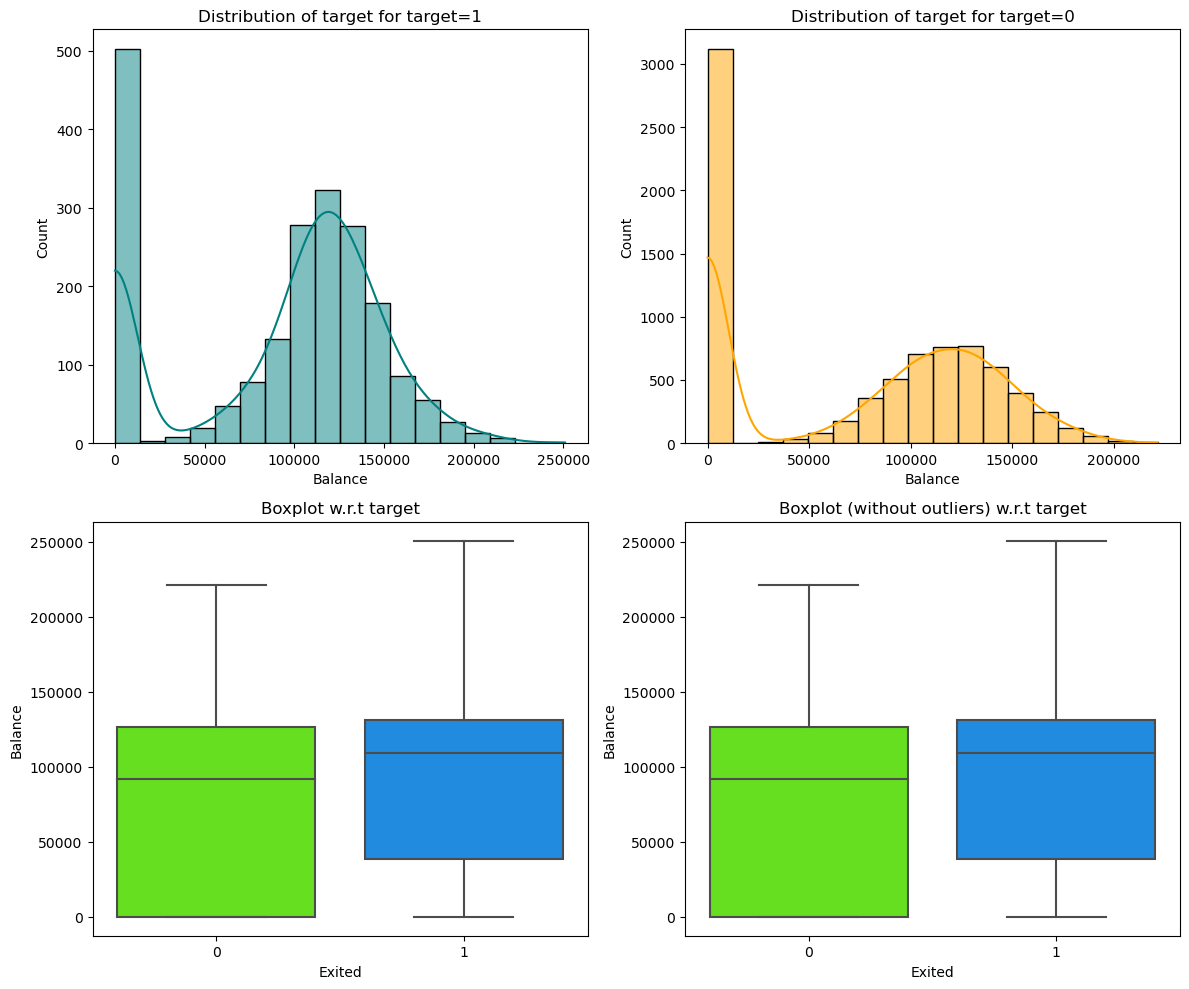

In [44]:
distribution_plot_wrt_target(data, "Balance", "Exited")

####Observations
- Customers who have relatively low balance in their accounts tend to keep their accounts open.

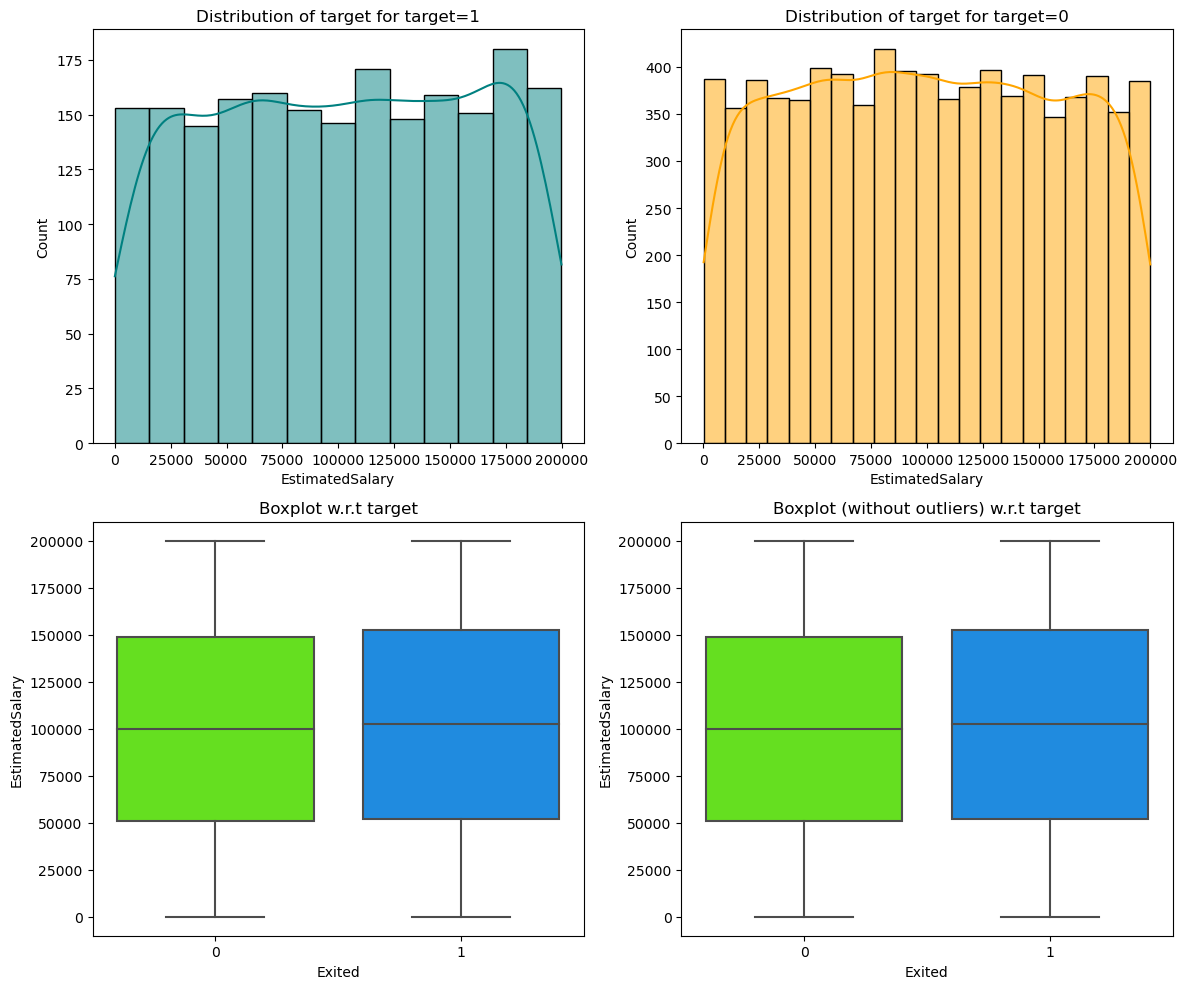

In [45]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

####Observations
- Estimated Salary doesn't seem to affect churn.

## Data Preprocessing

### Train-validation-test Split

In [865]:
X = data.drop(['Exited'], axis=1)
Y = data['Exited']

In [866]:
X_large, X_test, y_large, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42,stratify=Y,shuffle = True)

In [867]:
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True)

In [868]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [869]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Dummy Variable Creation

We'll create dummy variables for Geography and Gender as they are the only non-numerical variables.

In [870]:
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

In [871]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1995,584,44,5,95671.75,2,1,1,106564.88,0,0,0
2724,453,38,8,120623.21,1,1,0,129697.99,1,0,0
5224,803,43,3,0.00,1,1,0,72051.44,0,1,1
7697,601,41,3,0.00,2,1,0,54342.83,0,1,0
1226,531,42,6,88324.31,2,1,0,75248.75,1,0,0


### Data Normalization

In [872]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are customer churns correctly predicted by the model.
- False negatives (FN) are real customer churns where there is no prediction by model.
- False positives (FP) are customer churns predictions where there is no customer churn.

We need to choose the metric which will ensure that the maximum number of customer churns are predicted correctly by the model.
We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
We want to minimize false negatives because if a model predicts that a customer will not churn when there will be a churn, it will mean lost opportunity.

In [873]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [874]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [712]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [713]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(32, activation='relu',kernel_initializer='he_normal', input_dim = X_train.shape[1]))
model_0.add(Dense(16, activation='relu',kernel_initializer='he_normal'))
model_0.add(Dense(1, activation = 'sigmoid'))

In [714]:
#Using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.01)
metric = keras.metrics.Recall()

In [715]:
#Compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [716]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [717]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=64,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5597 - recall: 0.0294 - val_loss: 0.5260 - val_recall: 0.0049
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: 0.5188 - recall: 0.0057 - val_loss: 0.5010 - val_recall: 0.0000e+00
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4966 - recall: 0.0041 - val_loss: 0.4843 - val_recall: 0.0098
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - recall: 0.0139 - val_loss: 0.4721 - val_recall: 0.0270
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4691 - recall: 0.0237 - val_loss: 0.4627 - val_recall: 0.0491
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4600 - recall: 0.0491 - val_loss: 0.4556 - val_recall: 0.0663
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4529 - recall: 0.0744 - val_loss: 0.4502 - val_recall: 0.0786
Epoch 8/50
94/94 [==========================

**Loss function**

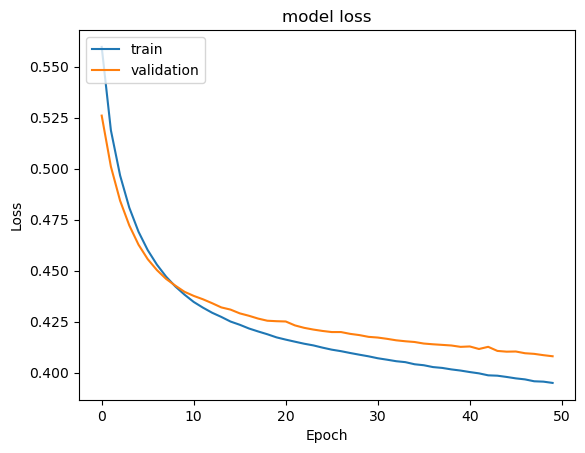

In [718]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- The loss curves are smooth however there is slight overfitting.

**Recall**

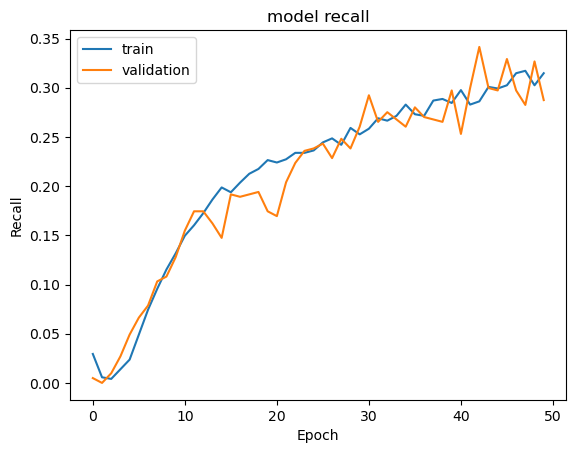

In [720]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Recall for validation and train sets are overlapping but there is a lot of stochastic noise.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.221776, G-Mean=0.730


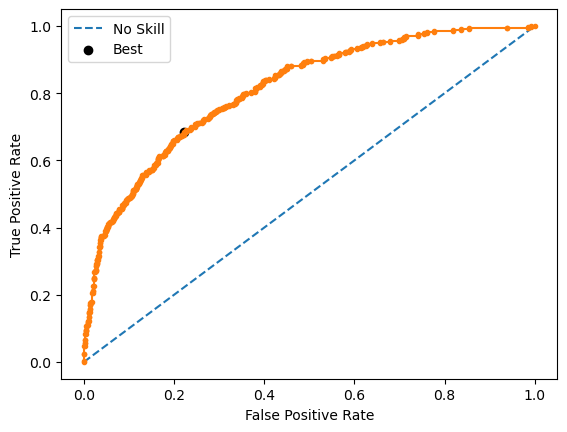

In [721]:
# predict probabilities
yhat1 = model_0.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [722]:
#Predicting the results using the best threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [723]:
#Predicting the results using the best threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [724]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [725]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4777
           1       0.45      0.68      0.54      1223

    accuracy                           0.76      6000
   macro avg       0.68      0.73      0.69      6000
weighted avg       0.81      0.76      0.78      6000



In [726]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1593
           1       0.44      0.64      0.52       407

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.80      0.76      0.78      2000



####Observations
- We got a recall of 0.68 on training and 0.64 on validation dataset. Let's see if it can be improved with different optimizer.

**Confusion matrix**

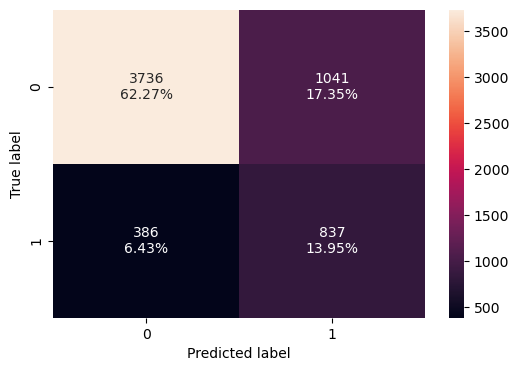

In [727]:
make_confusion_matrix(y_train, y_train_pred)

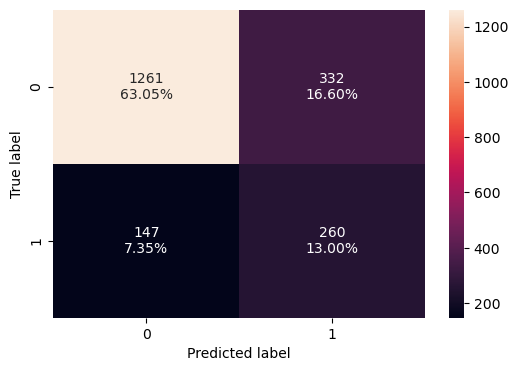

In [728]:
make_confusion_matrix(y_val, y_val_pred)

####Observations
- From the confusion matrix, we see about 7% false negatives.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [751]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [752]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_dim = X_train.shape[1]))
model_1.add(Dense(32,activation='relu', kernel_initializer='he_normal'))
model_1.add(Dense(1, activation = 'sigmoid'))

In [753]:
optimizer = tf.keras.optimizers.Adam(0.0001)
metric = keras.metrics.Recall()

In [754]:
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [755]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [756]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=64,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5029 - recall: 0.1922 - val_loss: 0.4811 - val_recall: 0.1155
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4690 - recall: 0.1292 - val_loss: 0.4634 - val_recall: 0.0958
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4537 - recall: 0.1276 - val_loss: 0.4532 - val_recall: 0.1130
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4440 - recall: 0.1431 - val_loss: 0.4467 - val_recall: 0.1499
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4374 - recall: 0.1643 - val_loss: 0.4417 - val_recall: 0.1622
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4323 - recall: 0.1832 - val_loss: 0.4380 - val_recall: 0.1843
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4282 - recall: 0.2061 - val_loss: 0.4347 - val_recall: 0.1892
Epoch 8/50
94/94 [==============================

**Loss function**

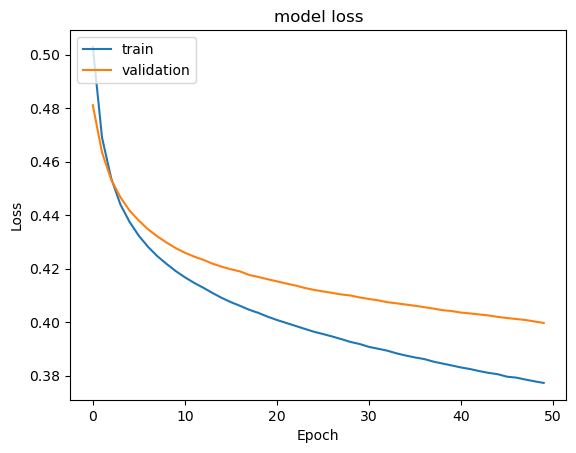

In [757]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- The loss curves are smotth however there is overfitting.

**Recall**

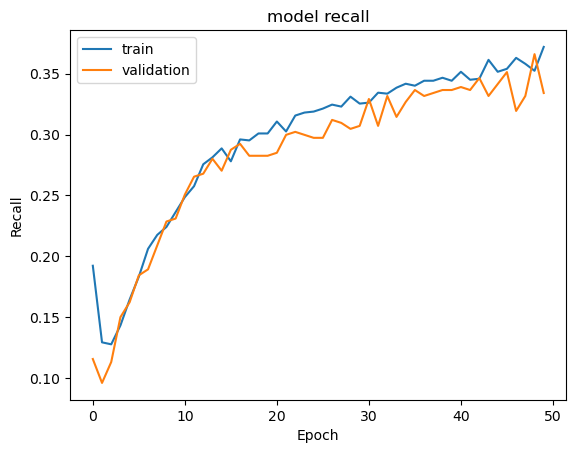

In [758]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Recall curves are still converging but noise has somewhat reduced with a lower learning rate, more number of nodes and the Adam optimizer.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.217925, G-Mean=0.745


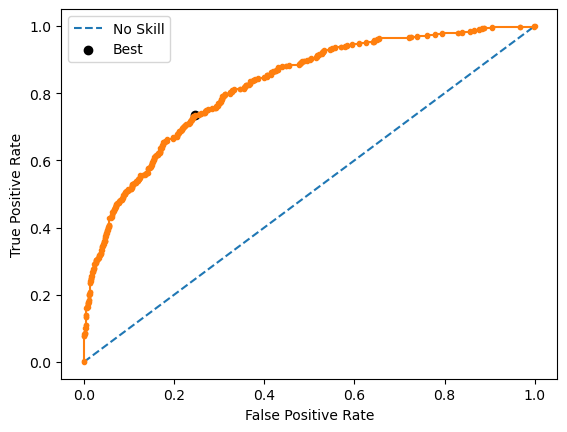

In [759]:
# predict probabilities
yhat1 = model_1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [760]:
#Predicting the results using the best threshold
y_train_pred=model_1.predict(X_train)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [761]:
#Predicting the results using the best threshold
y_val_pred=model_1.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [762]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [763]:
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      4777
           1       0.45      0.73      0.56      1223

    accuracy                           0.76      6000
   macro avg       0.68      0.75      0.70      6000
weighted avg       0.82      0.76      0.78      6000



In [764]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1593
           1       0.43      0.68      0.53       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



####Observations
- Recall on both training and validation sets have improved. Let's see if we can improve further with dropout technique.

**Confusion matrix**

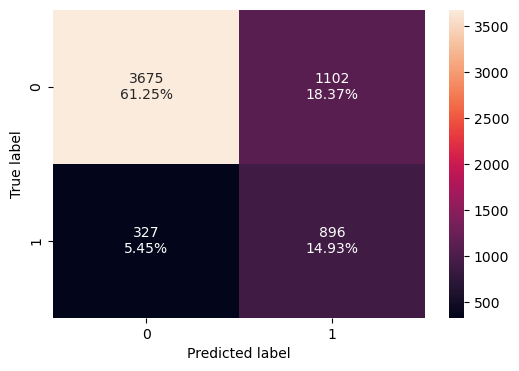

In [765]:
make_confusion_matrix(y_train, y_train_pred)

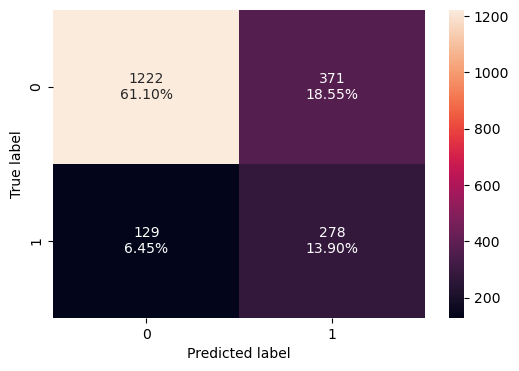

In [766]:
make_confusion_matrix(y_val, y_val_pred)

####Observations
- We have about 6% false negatives with this model.

### Neural Network with Adam Optimizer and Dropout

In [767]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [768]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(256,activation='relu', kernel_initializer='he_normal', input_dim = X_train.shape[1]))
model_2.add(Dropout(0.3))
model_2.add(Dense(128,activation='relu', kernel_initializer='he_normal'))
model_2.add(Dense(64,activation='relu', kernel_initializer='he_normal'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32,activation='relu', kernel_initializer='he_normal'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [769]:
optimizer = tf.keras.optimizers.Adam(0.0001)
metric = keras.metrics.Recall()

In [770]:
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [771]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [772]:
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=128,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
47/47 [==============================] - 2s 12ms/step - loss: 0.6291 - recall: 0.1897 - val_loss: 0.5148 - val_recall: 0.0000e+00
Epoch 2/50
47/47 [==============================] - 0s 7ms/step - loss: 0.5341 - recall: 0.0769 - val_loss: 0.4725 - val_recall: 0.0025
Epoch 3/50
47/47 [==============================] - 0s 6ms/step - loss: 0.5008 - recall: 0.1087 - val_loss: 0.4546 - val_recall: 0.0098
Epoch 4/50
47/47 [==============================] - 0s 6ms/step - loss: 0.4858 - recall: 0.1087 - val_loss: 0.4453 - val_recall: 0.0565
Epoch 5/50
47/47 [==============================] - 0s 7ms/step - loss: 0.4803 - recall: 0.1284 - val_loss: 0.4407 - val_recall: 0.0934
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 0.4709 - recall: 0.1488 - val_loss: 0.4369 - val_recall: 0.1155
Epoch 7/50
47/47 [==============================] - 0s 7ms/step - loss: 0.4684 - recall: 0.1554 - val_loss: 0.4342 - val_recall: 0.1229
Epoch 8/50
47/47 [=========================

**Loss function**

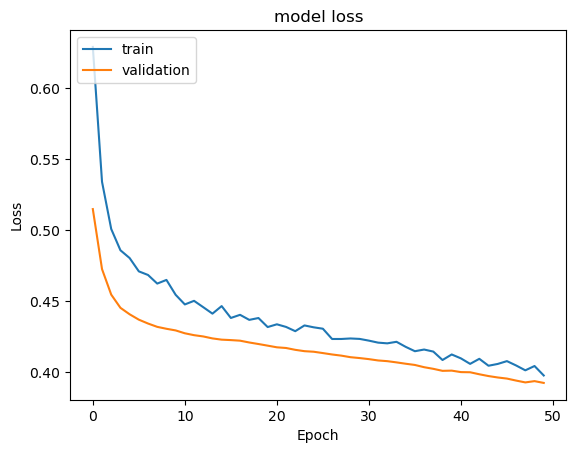

In [773]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Loss curves are smooth and converging.

**Recall**

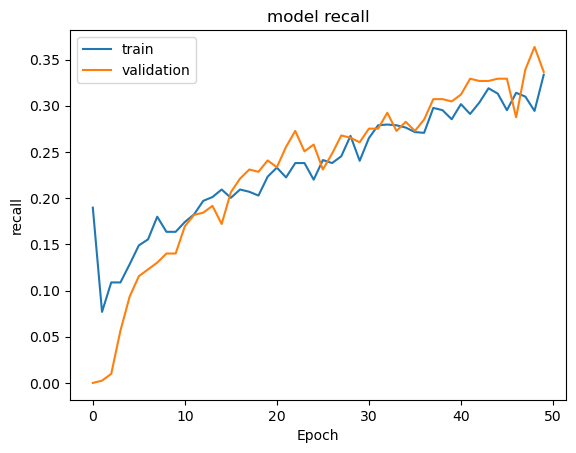

In [774]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Recall curves are nearlly overlapping which is good.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.213844, G-Mean=0.755


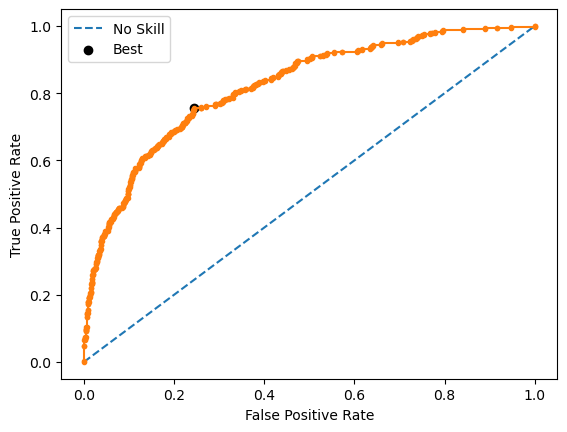

In [775]:
# predict probabilities
yhat1 = model_2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [776]:
#Predicting the results using the best threshold
y_train_pred=model_2.predict(X_train)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [777]:
#Predicting the results using the best threshold.
y_val_pred=model_2.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [778]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [779]:
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.76      0.84      4777
           1       0.45      0.75      0.56      1223

    accuracy                           0.76      6000
   macro avg       0.69      0.76      0.70      6000
weighted avg       0.83      0.76      0.78      6000



In [780]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.43      0.71      0.54       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



####Observations
- Both recalls on train and validation sets have improved with the dropout technique.

**Confusion matrix**

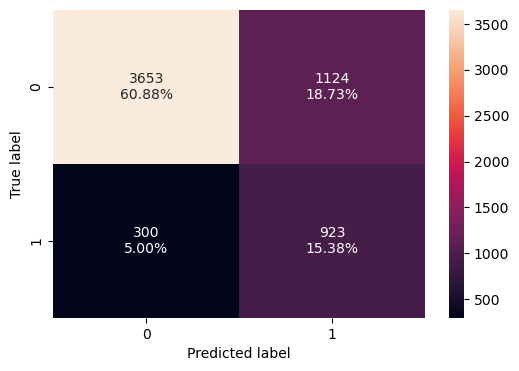

In [781]:
make_confusion_matrix(y_train, y_train_pred)

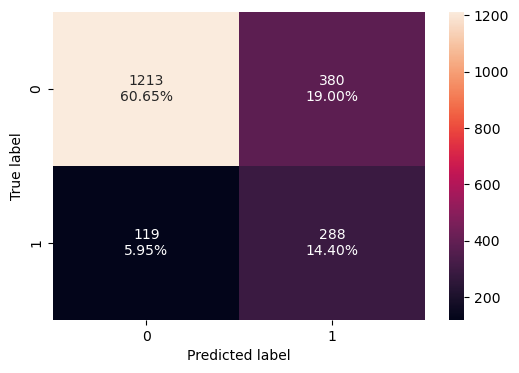

In [782]:
make_confusion_matrix(y_val, y_val_pred)

####Observations
- False negatives have dropped slightly to around 5%.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset to account for the imbalance*

In [783]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



Let's build a model with the balanced dataset

In [784]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [785]:
#Initializing the model
model_3 = Sequential()
model_3.add(Dense(16,activation='relu',kernel_initializer='he_normal',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [786]:
optimizer = tf.keras.optimizers.SGD(0.01)
metric = keras.metrics.Recall()

In [787]:
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [788]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [789]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
150/150 [==============================] - 1s 4ms/step - loss: 0.7012 - recall: 0.5426 - val_loss: 0.6821 - val_recall: 0.5872
Epoch 2/50
150/150 [==============================] - 1s 3ms/step - loss: 0.6499 - recall: 0.5828 - val_loss: 0.6552 - val_recall: 0.6265
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6259 - recall: 0.6462 - val_loss: 0.6275 - val_recall: 0.6265
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6111 - recall: 0.6739 - val_loss: 0.6242 - val_recall: 0.6536
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6005 - recall: 0.6954 - val_loss: 0.6073 - val_recall: 0.6462
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5909 - recall: 0.7019 - val_loss: 0.6067 - val_recall: 0.6683
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.5832 - recall: 0.7180 - val_loss: 0.5935 - val_recall: 0.6658
Epoch 8/50
150/150 [==============

**Loss function**

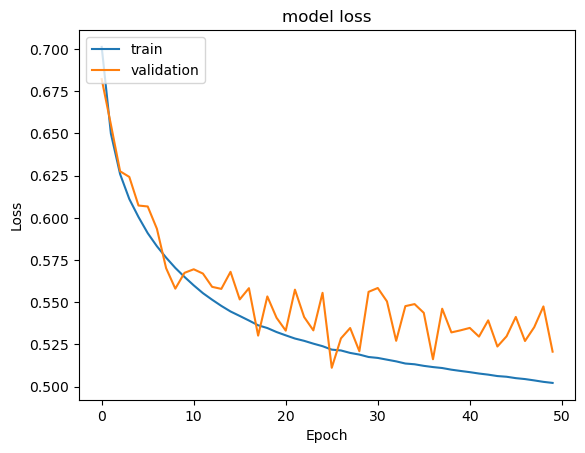

In [790]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Validation loss curve is not smooth 

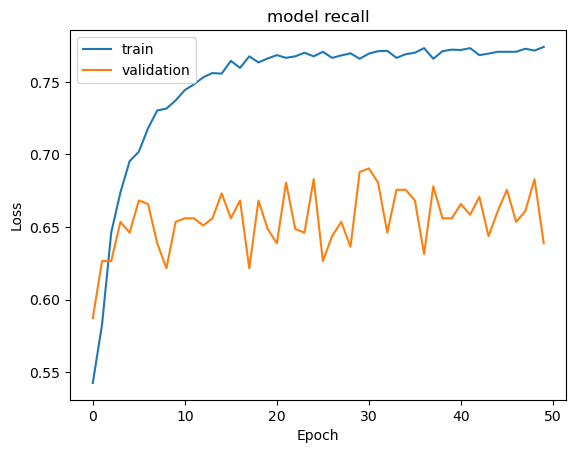

In [791]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Recall curves have some noise too.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.426601, G-Mean=0.724


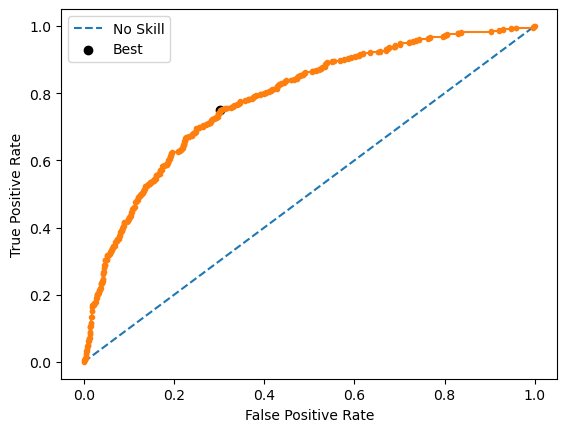

In [792]:
# predict probabilities
yhat1 = model_3.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [793]:
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [794]:
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [795]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [796]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      4777
           1       0.73      0.81      0.77      4777

    accuracy                           0.76      9554
   macro avg       0.76      0.76      0.76      9554
weighted avg       0.76      0.76      0.76      9554



In [797]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.72      0.50       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



####Observations
- Both recalls have improved with SMOTE oversampling.

**Confusion matrix**

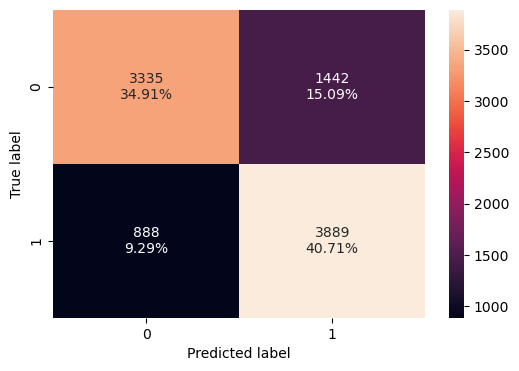

In [798]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

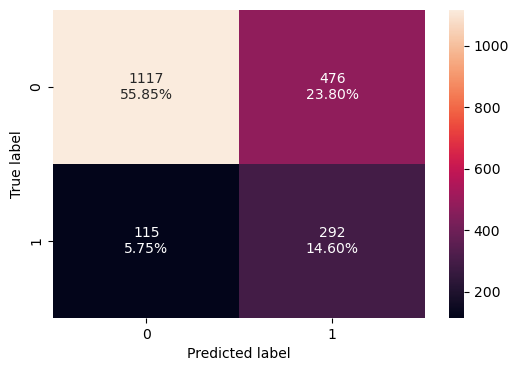

In [799]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

####Observations
- False negatives have increased slightly.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [858]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

AttributeError: 'RandomizedSearchCV' object has no attribute 'seed'

In [801]:
#Initializing the model
model_4 = Sequential()
model_4.add(Dense(32,activation='relu', kernel_initializer='he_normal', input_dim = X_train_smote.shape[1]))
model_4.add(Dense(16,activation='relu', kernel_initializer='he_normal'))
model_4.add(Dense(1, activation = 'sigmoid'))

In [802]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = keras.metrics.Recall()

In [803]:
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [804]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [805]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
150/150 [==============================] - 2s 5ms/step - loss: 0.6627 - recall: 0.5658 - val_loss: 0.6119 - val_recall: 0.6314
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5801 - recall: 0.7025 - val_loss: 0.5770 - val_recall: 0.6658
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5476 - recall: 0.7429 - val_loss: 0.5612 - val_recall: 0.6585
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5332 - recall: 0.7544 - val_loss: 0.5506 - val_recall: 0.6511
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5235 - recall: 0.7584 - val_loss: 0.5521 - val_recall: 0.6536
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5165 - recall: 0.7666 - val_loss: 0.5562 - val_recall: 0.6658
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5095 - recall: 0.7601 - val_loss: 0.5285 - val_recall: 0.6486
Epoch 8/50
150/150 [==============

**Loss function**

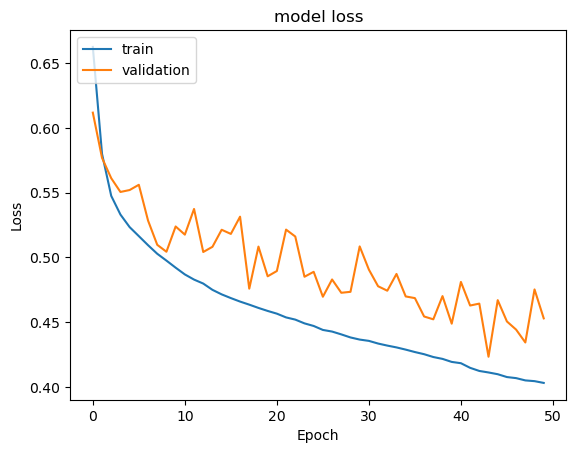

In [806]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Loss curves look slightly better than before.

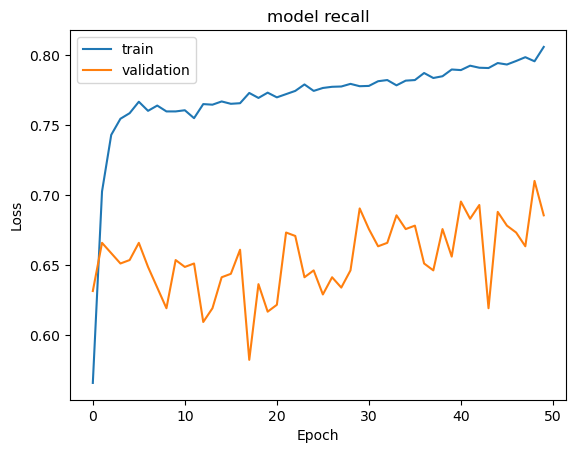

In [807]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Recall curves are noisy but going upwards.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.454094, G-Mean=0.767


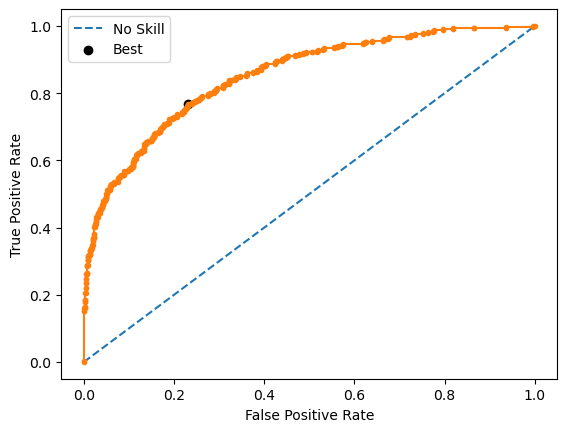

In [808]:
# predict probabilities
yhat1 = model_4.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [809]:
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [810]:
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [811]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [812]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4777
           1       0.80      0.84      0.82      4777

    accuracy                           0.82      9554
   macro avg       0.82      0.82      0.82      9554
weighted avg       0.82      0.82      0.82      9554



In [813]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



####Observations
- Both recall on train and validation sets have improved with SMOTE and Adam optimizer.

**Confusion matrix**

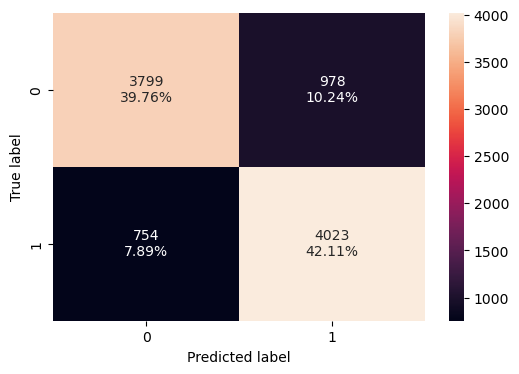

In [814]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

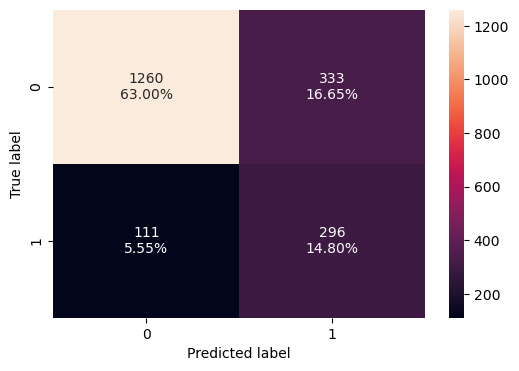

In [815]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

####Observations
- False negatives have reduced slighlty compared to the last model.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [822]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [823]:
#Initializing the model
model_5 = Sequential()
model_5.add(Dense(128,activation='relu', kernel_initializer='he_normal', input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(0.2))
model_5.add(Dense(64,activation='relu', kernel_initializer='he_normal'))
model_5.add(Dense(32,activation='relu', kernel_initializer='he_normal'))
model_5.add(Dropout(0.3))
model_5.add(Dense(16,activation='relu', kernel_initializer='he_normal'))
model_5.add(Dense(1, activation = 'sigmoid'))

In [824]:
optimizer = tf.keras.optimizers.Adam(0.0001)
metric = keras.metrics.Recall()

In [825]:
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [826]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [827]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 [==============================] - 2s 6ms/step - loss: 0.7130 - recall: 0.5305 - val_loss: 0.6082 - val_recall: 0.5184
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6501 - recall: 0.5977 - val_loss: 0.5792 - val_recall: 0.5676
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6262 - recall: 0.6353 - val_loss: 0.5661 - val_recall: 0.6167
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6087 - recall: 0.6634 - val_loss: 0.5634 - val_recall: 0.6388
Epoch 5/50
150/150 [==============================] - 1s 5ms/step - loss: 0.5930 - recall: 0.6849 - val_loss: 0.5463 - val_recall: 0.6314
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 0.5879 - recall: 0.6908 - val_loss: 0.5469 - val_recall: 0.6339
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.5816 - recall: 0.6929 - val_loss: 0.5452 - val_recall: 0.6364
Epoch 8/50
150/150 [==============

**Loss function**

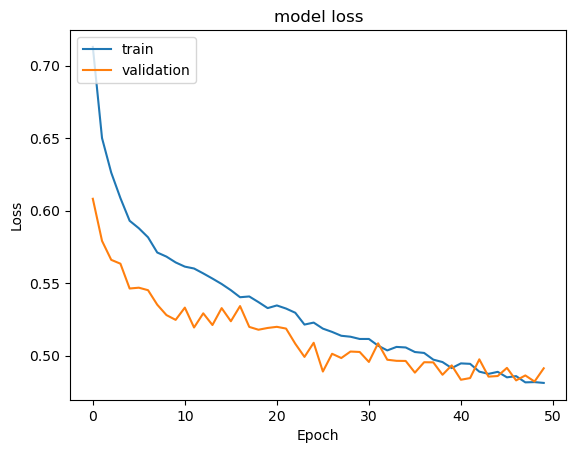

In [828]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Loss curves are smooth and converging signaling a good fit.

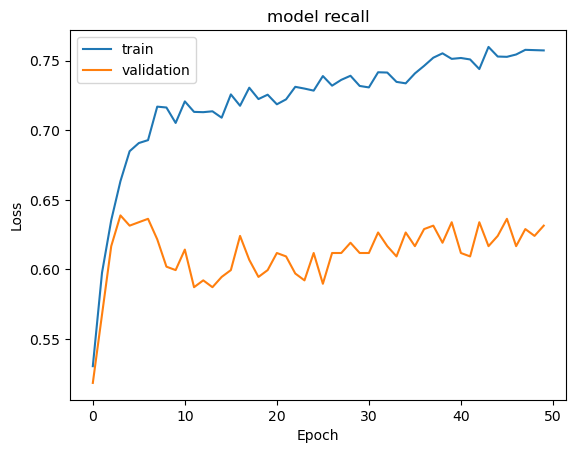

In [829]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Observations
- Recall curves are less noisy than before.

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.449085, G-Mean=0.746


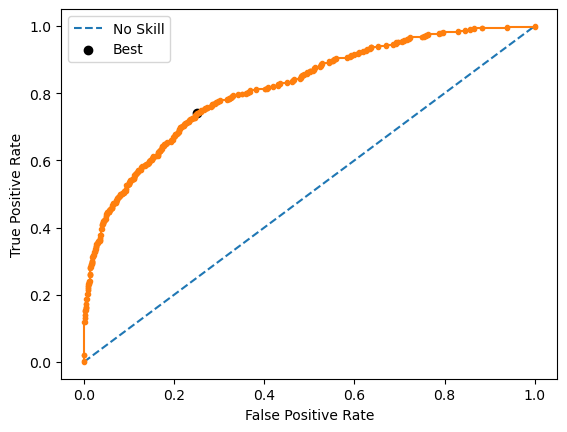

In [830]:
# predict probabilities
yhat1 = model_5.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [831]:
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [832]:
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [833]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [834]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      4777
           1       0.78      0.83      0.80      4777

    accuracy                           0.80      9554
   macro avg       0.80      0.80      0.80      9554
weighted avg       0.80      0.80      0.80      9554



In [835]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1593
           1       0.43      0.68      0.52       407

    accuracy                           0.75      2000
   macro avg       0.66      0.72      0.68      2000
weighted avg       0.81      0.75      0.77      2000



####Observations
- Our recal scores however have taken a hit compared to the last model.

**Confusion matrix**

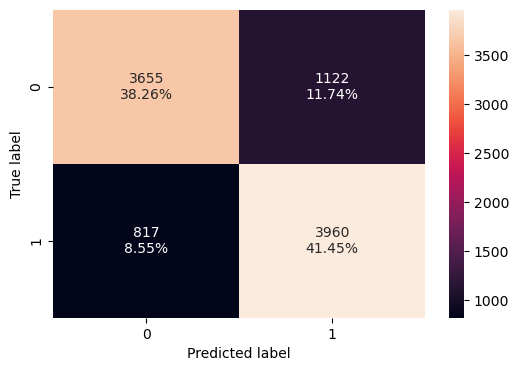

In [836]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

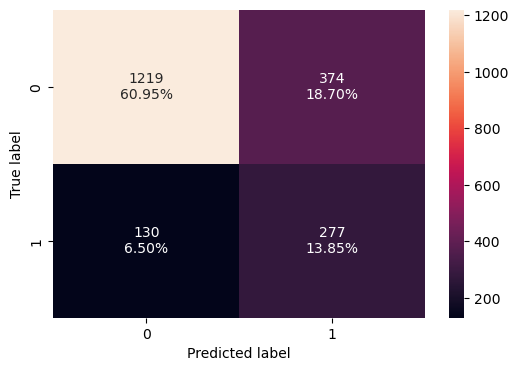

In [837]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

####Observations
- False negatives have also increased.

## Model Performance Comparison and Final Model Selection

In [838]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.684383
NN with Adam,0.732625
NN with Adam & Dropout,0.754702
NN with SMOTE & SGD,0.814109
NN with SMOTE & Adam,0.842160
"NN with SMOTE,Adam & Dropout",0.828972


In [839]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.638821
NN with Adam,0.683047
NN with Adam & Dropout,0.707617
NN with SMOTE & SGD,0.717445
NN with SMOTE & Adam,0.727273
"NN with SMOTE,Adam & Dropout",0.680590


In [840]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.045562
NN with Adam,0.049578
NN with Adam & Dropout,0.047085
NN with SMOTE & SGD,0.096665
NN with SMOTE & Adam,0.114888
"NN with SMOTE,Adam & Dropout",0.148382


####Observations
- Looking at all model performances, the NN with SMOTE and Adam is giving the highest recall and will be our model of choice.

In [849]:
y_test_pred = model_4.predict(X_test)
y_test_pred = (y_test_pred > 0.454094) ##using the best threshold for model 4
print(y_test_pred)

63/63 [==============================] - 1s 5ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [850]:
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



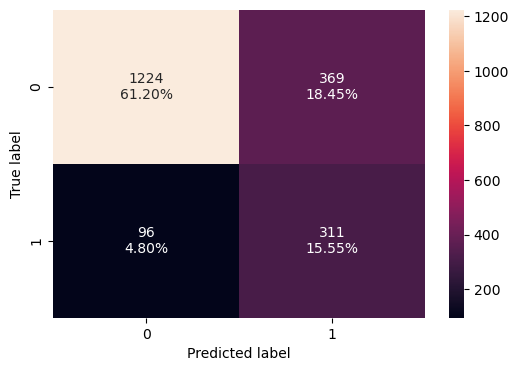

In [851]:
make_confusion_matrix(y_test,y_test_pred)

####Observations
- We got a 0.76 recall on the test dataset and 4.8% false positives.

## Actionable Insights and Business Recommendations

####Insights
- Customers in Germany are more likely to close accounts than thsose in Spain. Almost one third of German customers in our sample left the bank.
- Females are more likely to close accounts than males.
- Credit score, presence of credit card and estimated salary do not seem to be strongly associated with customer churn.
- Younger customers (below 40) tend to keep their accounts open, while more senior customers (40+) tend to close their accounts.
- Customers who choose to close their accounts may either have shorter or longer time of experience with the bank service compared with those who keep their accounts open.
- Customers who have relatively low balance in their accounts tend to keep their accounts open.
- Inactive members are more likely to close accounts than active members, which is normal.
- Customers with more products have a higher chance of leaving the bank.

####Recommendations
- Our selected Neural Network model with SMOTE and ADAM Optimizer, can help the bank proactively predict customer churn and take steps accordingly to better retain customers.
- Some steps the bank can take to proactively reduce churn:
  1. Investigate why German customers are leaving the bank more. Maybe there is a language barrier, or local competition that offers better services. The bank should then invest in training German-speaking employees and offer better customer service.
  2. Investigate why female customers are leaving the bank more. Is this a by-product of joint accounts in the husband's name after marriage or is something else lacking in services.
  3. See if there are any retirement specific products can be built to serve the older customer segment.
  4. Invest in good onboarding and early support for new customers to retain them for longer.
  5. Investigate why more products means more churn.This seems contrary to intuition that more products would mean more loyalty.
- A lot of the variables lack proper context and meaning. It is advisable to go back to the business and get deeper understanding of these datapoints.